In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

df = pd.read_csv("../data/athlete_events.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/athlete_events.csv'

In [ ]:
fra = df.query("NOC == 'FRA'")
fra.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
145,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,NaN
149,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Individual",NaN
150,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team",Gold
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold


In [ ]:
medal = "Silver"
fra.loc[fra.eval("Medal == @medal & Sex == 'M'"), "Sport"].value_counts()

Fencing                 85
Rowing                  48
Sailing                 39
Athletics               38
Rugby                   34
Cycling                 34
Swimming                28
Basketball              26
Archery                 25
Shooting                25
Equestrianism           23
Gymnastics              17
Football                16
Handball                15
Canoeing                11
Boxing                   8
Alpine Skiing            7
Tennis                   7
Tug-Of-War               5
Judo                     5
Wrestling                4
Biathlon                 3
Art Competitions         3
Cricket                  3
Freestyle Skiing         3
Weightlifting            3
Figure Skating           2
Croquet                  2
Cross Country Skiing     1
Polo                     1
Table Tennis             1
Nordic Combined          1
Name: Sport, dtype: int64

In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<AxesSubplot:xlabel='Age', ylabel='Count'>

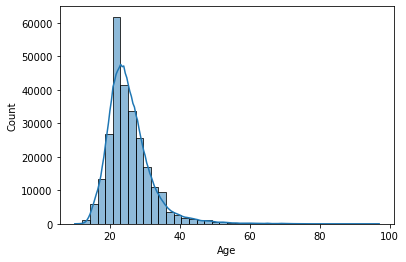

In [ ]:
sns.histplot(data=df["Age"], kde=True, bins=40)

In [ ]:
# oldest person in OS
df["Age"].max()

97.0

In [ ]:
df[df["Age"] == 97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [ ]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [ ]:
import plotly.express as px 
table_tennis_gold = df[(df["Sport"] == "Table Tennis") & (df["Medal"]=="Gold")]
table_tennis_gold_NOC = pd.DataFrame(table_tennis_gold["NOC"].value_counts())
px.pie(table_tennis_gold_NOC, values="NOC", names=table_tennis_gold_NOC.index, title="Pingis guld från 1896-2016") 

In [ ]:
df[(df["Sport"] == "Table Tennis") & (df["NOC"] == "SWE") & (df["Medal"]=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
255767,128051,Jan-Ove Waldner,M,26.0,179.0,76.0,Sweden,SWE,1992 Summer,1992,Summer,Barcelona,Table Tennis,Table Tennis Men's Singles,Gold


In [ ]:
df[(df["Medal"] == "Gold") & (df["NOC"]=="SWE")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1237,697,Fausto Alesio Acke (Padovini-),M,22.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Swedish System",Gold
1755,974,Nils August Domingo Adlercreutz,M,45.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Team",Gold
1762,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Platform,Gold
1763,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Plain High,Gold
2462,1378,Arne Per hman,M,23.0,176.0,64.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Triple Jump,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260490,130357,Emma Christina Wikn,F,24.0,167.0,60.0,Sweden,SWE,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,Gold
260493,130360,Elis Wiklund,M,26.0,185.0,80.0,Sweden,SWE,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,Gold
260516,130374,Leif Gordon Wikstrm,M,38.0,NaN,NaN,Slaghoken II,SWE,1956 Summer,1956,Summer,Melbourne,Sailing,Sailing Mixed Three Person Keelboat,Gold
261650,130925,David Lepold Wiman,M,27.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Gymnastics,"Gymnastics Men's Team All-Around, Swedish System",Gold


In [ ]:
print(f'Sverige har hållit OS: {df[df["City"] == "Stockholm"]["Year"].unique()}')
df[df["Year"] == 1956]["City"].unique()

Sverige har hållit OS: [1912 1956]


array(["Cortina d'Ampezzo", 'Melbourne', 'Stockholm'], dtype=object)

Text(0.5, 0, 'Count')

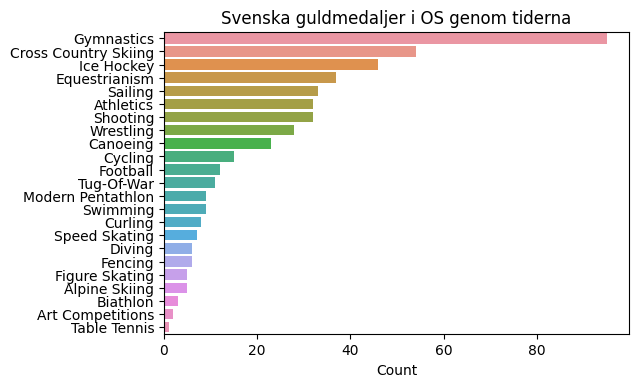

In [ ]:
fig = plt.figure(dpi=100)

swe_gold = df[(df["NOC"] == "SWE") & (df["Medal"] == "Gold")]
swe_gold_sports = swe_gold["Sport"].value_counts()
fig = sns.barplot(y=swe_gold_sports.index, x=swe_gold_sports.values)
fig.set_title("Svenska guldmedaljer i OS genom tiderna")
fig.set_xlabel("Count")

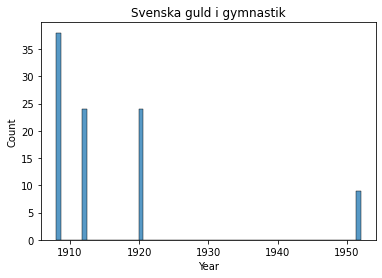

In [ ]:
swe_gold_gymnastic = swe_gold[swe_gold["Sport"] == "Gymnastics"]
fig = sns.histplot(swe_gold_gymnastic.Year, bins =70)
fig.set_title("Svenska guld i gymnastik");

C:\Users\kokch\.virtualenvs\Databehandling--bsp-T9-\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



,Age,Sport
0,24.0,Basketball
1,23.0,Judo
2,24.0,Football
3,34.0,Tug-Of-War
4,21.0,Speed Skating
...,...,...
271111,29.0,Luge
271112,27.0,Ski Jumping
271113,27.0,Ski Jumping
271114,30.0,Bobsleigh


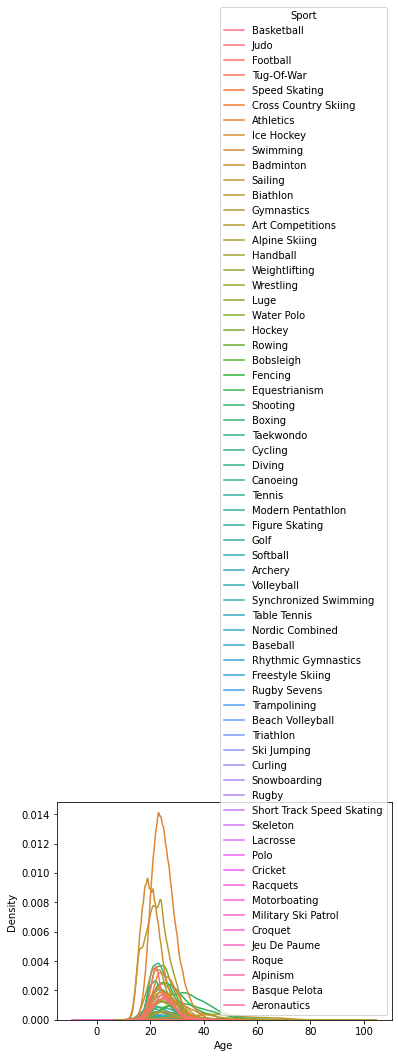

In [ ]:
# ålder och sport?
age_sport = df[["Age", "Sport"]]
sns.kdeplot(data=age_sport, x="Age", hue="Sport")
age_sport

In [ ]:
print(f'Antal sportgrupper: {len(age_sport["Sport"].unique())}')
age_sport["Sport"].unique()

Antal sportgrupper: 66


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [ ]:
# vilka länder har tagit medaljer
print(f'Totalt antal länder som deltagit: {df["NOC"].unique().shape[0]}')
df[df.Medal.notnull()]["NOC"].value_counts()[:17]

Totalt antal länder som deltagit: 230


USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
NOR    1033
GDR    1005
CHN     989
JPN     913
FIN     900
Name: NOC, dtype: int64

In [ ]:
df[df["Age"]==10]       

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


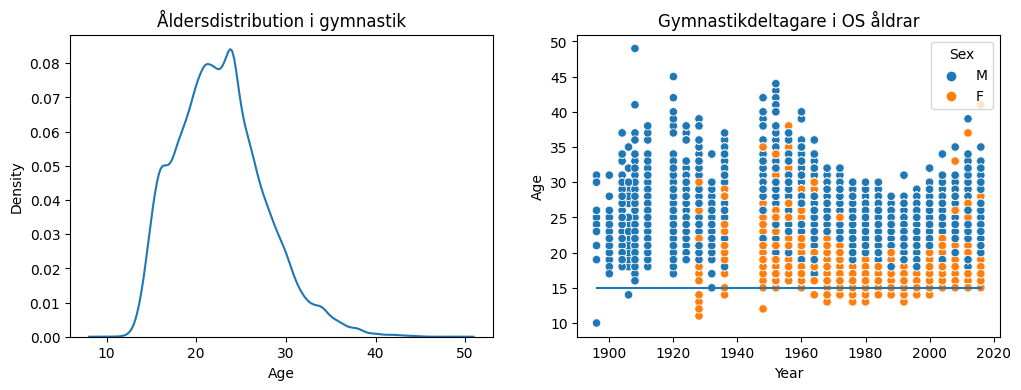

In [ ]:
import numpy as np 

gymnastic = df[df["Sport"] == "Gymnastics"]

x = np.ones(len(gymnastic))
fig, axes = plt.subplots(1,2,dpi=100, figsize=(12,4))
sns.kdeplot(gymnastic["Age"], ax=axes[0])
axes[0].set_title("Åldersdistribution i gymnastik")

fig = sns.scatterplot(data=gymnastic, x="Year", y="Age", hue="Sex", ax=axes[1])
fig.plot([1896, 2016], [15, 15])
fig.set_title("Gymnastikdeltagare i OS åldrar");

In [ ]:
gymnastic.Year.values

array([1948, 1948, 1948, ..., 1896, 1896, 1896], dtype=int64)

In [ ]:
# vilka länder har tagit flest guld?



In [ ]:
# ålderstatistik 
df.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [ ]:
import hashlib 

df.insert(1,"Hashed names", df["Name"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest()))

In [ ]:
df.head()

,ID,Hashed names,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
str_df = df.applymap(str)
str_df.applymap(lambda x: hashlib.sha256(x.encode()).hexdigest())

,ID,Hashed names,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,1835f69bd6b0b9e81fb90daa6ba36bc6a263e8b6852ca7...,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,08f271887ce94707da822d5263bae19d5519cb3614e0da...,dce81cca484053ef71096b308cb234b77b4ff19b507b7e...,9598d1edef9a37c9d4a9ff783906af30933a1bdac58ec5...,5afc581cc9ea399a2b1fa46aef3df4bea99fdbcf962851...,10436829032f361a3de50048de41755140e581467bc189...,bbfd32d8e72a9062a10c25a239a8694c130f6d23af05b1...,935a0140dd9743d6057986dc936730481713dcffd3b9d3...,3f83e9ad5be63bd5bf2fd009fffe6b7dd4066243975bc9...,c0de243c407c0e98ed0364e1d0c636d542318867862aac...,062dda15f8838576019a50b01bdf29cc5046008bbfcfaa...,3530d1806b6a3b4f1ea1084024cf3cb58b51a6a5b2fddf...,ab317391a79a5fc5b796c101f6e2799d58747323fe7f0d...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,36b954be919c253ff4fe04cbbb88521be1c8ccb8db6f9c...,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,08f271887ce94707da822d5263bae19d5519cb3614e0da...,c22cd1ea7268eed0a17f08b05559b6f7939040cf707d5a...,fd91ce9f7f9b8567eb93faebc7c89f33306d3600eb3d1d...,db58b6c40698d7371bbcff35d085e1bac5fa439d0de31e...,10436829032f361a3de50048de41755140e581467bc189...,bbfd32d8e72a9062a10c25a239a8694c130f6d23af05b1...,3457ff59a3401c08d7294566ba0516e77f1c500a263b7e...,4b9a7f50c0bb198c6f5414c5a8459f5d216d34ab521ea9...,c0de243c407c0e98ed0364e1d0c636d542318867862aac...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,1ff4e85c7aaecae083a23f64600497d89a101e5c1eb455...,8f267d45eecb8270e5eb9c39e6fc78e3a140e15c9558f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,6610aa9ce7fef46a06484058428e89fe73976bfe079359...,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,08f271887ce94707da822d5263bae19d5519cb3614e0da...,dce81cca484053ef71096b308cb234b77b4ff19b507b7e...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,c527097577600a6726de99bd6f555fbfaf214da9b7d127...,2fcc32efa12bc6f248a98584b1e110f682b56f0b801547...,a7e84e307ea4bc59d1498302a3a14baf6e42520726cd3a...,6b5f40c09215713a1fa83ea2de2adcae17e605b8958a2d...,c0de243c407c0e98ed0364e1d0c636d542318867862aac...,d76bbf28ac60c2c8840295033f991a8085745713d9a910...,cbe1b7d7f446e134f78cefe973dfbbde9969b81e541853...,1d0ab0043e4c9abac287ecc5409de6e4b6e255791a8091...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
3,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,7ceee5184ccd7b08b756b8f578d4d08cdc7e833e13a0d9...,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,08f271887ce94707da822d5263bae19d5519cb3614e0da...,1436c71c3bc18cb9ff43acdb59f3c6de30a069675bab73...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3defe2605f984f45198db4a5e18140314cbfa4e8916db0...,2fcc32efa12bc6f248a98584b1e110f682b56f0b801547...,04e7a6dd7d2442eda831918d527e98fe01fa5ba17248c3...,e41d64db5703c6440b5c714d57251a845bc0bd241480b4...,c0de243c407c0e98ed0364e1d0c636d542318867862aac...,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,610cb9b21b317ee940e0c677a4dcbe43d230291fbe6da1...,946a52420808bc02704adb04879913bcf20ee09f2616e4...,6249df4367d0a2e088c8eb1117ef59430f0d7dad4bf0fc...
4,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,d5521f815bc50199449f6f50ff7adffa2213871b76696c...,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,e4658389f3e9af055d9d349c5e68122e26dbce056fe0da...,0730ee8b219beb819f26af85b440a976ef77bbe517be3f...,3311663049fc19e9f878bd6e05ed36e8efcb8f58b802be...,3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d...,9ea4e3b85e324650a1ab403ad96abe96205360a1e84550...,6ea41bf6cc85d4736c0b5e0ab5d43c73d2e636d45c1ba4...,8266498d969081c29737b8daeb5b51d60e56d008fff243...,1b17869e03ecc1b0f86b003c199606eb68eaceb18927e3...,4dcbd74fcbd08192a287425acff97cfc3c8cf3dd46486d...,b208000794758e57c41ba9d6a3a392361ece503e67cd25